# Fixing Class Imbalance

## Imports and Reading Data

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("/kaggle/input/cleaned/train_cleaned.csv")

In [19]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_text_words
0,0000997932d777bf,explanation\n edits made username hardcore ...,0,0,0,0,0,0,"['explanation', 'edits', 'made', 'username', '..."
1,000103f0d9cfb60f,daww matches background colour im seemingly ...,0,0,0,0,0,0,"['daww', 'matches', 'background', 'colour', 'i..."
2,000113f07ec002fd,hey man im really trying edit war guy c...,0,0,0,0,0,0,"['hey', 'man', 'im', 'really', 'trying', 'edit..."
3,0001b41b1c6bb37e,cant make real suggestions improvement won...,0,0,0,0,0,0,"['cant', 'make', 'real', 'suggestions', 'impro..."
4,0001d958c54c6e35,sir hero chance remember page thats,0,0,0,0,0,0,"['sir', 'hero', 'chance', 'remember', 'page', ..."


## Function to plot imbalance distribution

In [20]:
def produce_distribution_plot(column_name, ax=None):
    """
    Function to help determine the class imbalance
    
    Input -> Column name, subplot axis to use (optional)
    Output -> Graph showing the % of records that are 0 vs. 1
    """
    
    # normalize = True, convertes the frequency of occurance to a frequency belonging to [0, 1]
    toxic_percents = data[column_name].value_counts(normalize=True) * 100
    
    ax.bar(toxic_percents.index.astype(str), toxic_percents.values)
    ax.set_title(column_name + ' distribution split')
    ax.set_xlabel(column_name + ' value')
    ax.set_ylabel('Percentage')


## Plotting a grid of imbalance distribution

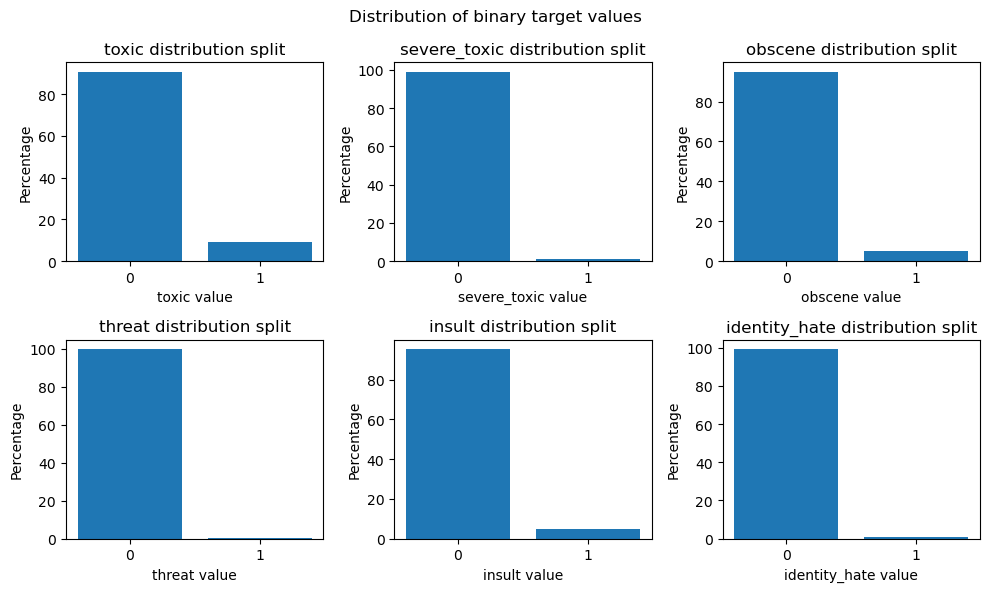

In [21]:
# create a 2x3 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

# loop through each column and create a bar plot in a subplot
for i, ax in enumerate(axes.flatten()):
    if i < 6:
        produce_distribution_plot(data.columns[2 + i], ax=ax)

fig.suptitle('Distribution of binary target values')

fig.tight_layout()

plt.show()

In [22]:
# just verifying whether the graphs make sense

class_count_0, class_count_1 = data['toxic'].value_counts()

class_0 = data[data['toxic'] == 0]
class_1 = data[data['toxic'] == 1]
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (135414, 9)
class 1: (13934, 9)


## Implementing over sampling on for the minority groups using imblearrn.over_sampling

In [23]:
# Importing module
from imblearn.over_sampling import RandomOverSampler

In [24]:
# Creating an instance of the Random Over Sampler
ros = RandomOverSampler(random_state=0)

In [25]:
# Oversampling the required number for each of the columns

X_resampled, y_resampled = ros.fit_resample(data.drop(columns=["toxic"]), data["toxic"])
data_resampled = pd.concat([X_resampled, y_resampled], axis=1)

X_resampled, y_resampled = ros.fit_resample(data.drop(columns=["severe_toxic"]), data["severe_toxic"])
data_resampled = pd.concat([X_resampled, y_resampled], axis=1)

X_resampled, y_resampled = ros.fit_resample(data.drop(columns=["obscene"]), data["obscene"])
data_resampled = pd.concat([X_resampled, y_resampled], axis=1)

X_resampled, y_resampled = ros.fit_resample(data.drop(columns=["threat"]), data["threat"])
data_resampled = pd.concat([X_resampled, y_resampled], axis=1)

X_resampled, y_resampled = ros.fit_resample(data.drop(columns=["insult"]), data["insult"])
data_resampled = pd.concat([X_resampled, y_resampled], axis=1)

X_resampled, y_resampled = ros.fit_resample(data.drop(columns=["identity_hate"]), data["identity_hate"])
data_resampled = pd.concat([X_resampled, y_resampled], axis=1)

In [26]:
# Seeing what data loooks like

data = data_resampled
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,comment_text_words,identity_hate
0,0000997932d777bf,explanation\n edits made username hardcore ...,0,0,0,0,0,"['explanation', 'edits', 'made', 'username', '...",0
1,000103f0d9cfb60f,daww matches background colour im seemingly ...,0,0,0,0,0,"['daww', 'matches', 'background', 'colour', 'i...",0
2,000113f07ec002fd,hey man im really trying edit war guy c...,0,0,0,0,0,"['hey', 'man', 'im', 'really', 'trying', 'edit...",0
3,0001b41b1c6bb37e,cant make real suggestions improvement won...,0,0,0,0,0,"['cant', 'make', 'real', 'suggestions', 'impro...",0
4,0001d958c54c6e35,sir hero chance remember page thats,0,0,0,0,0,"['sir', 'hero', 'chance', 'remember', 'page', ...",0


In [27]:
# Seeing how the dimensions of the dataset have changed, was initially 150k rows

data.shape

(296102, 9)

In [28]:
# just seeing how the split looks like now

for col in data.columns:
    
    if col in ['id', 'comment_text', 'comment_text_words']:
        continue
    
    print(col)
    
    class_count_0, class_count_1 = data['toxic'].value_counts()
    class_0 = data[data['toxic'] == 0]
    class_1 = data[data['toxic'] == 1]
    percentage0 = class_count_0 / (class_count_0 + class_count_1)
    percentage1 = class_count_1 / (class_count_0 + class_count_1)
    print('class 0:', str(round(percentage0 * 100, 2)) + "%", end = "\t\t")
    print('class 1:', str(round(percentage1 * 100, 2)) + "%")
    print()

toxic
class 0: 50.49%		class 1: 49.51%

severe_toxic
class 0: 50.49%		class 1: 49.51%

obscene
class 0: 50.49%		class 1: 49.51%

threat
class 0: 50.49%		class 1: 49.51%

insult
class 0: 50.49%		class 1: 49.51%

identity_hate
class 0: 50.49%		class 1: 49.51%

